### clustering experiments

t-SNE references:

https://distill.pub/2016/misread-tsne/#:~:text=A%20second%20feature%20of%20t-SNE%20is%20a%20tuneable,has%20a%20complex%20effect%20on%20the%20resulting%20pictures

https://medium.com/@ahsu2/visual-guide-to-understanding-t-sne-parameters-what-they-mean-6a8167d61689

#### Load modules

In [78]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#### Load data

In [215]:
# buildings
# file_path_1 = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\201207 combined embeddings\all_buildings_embeddings_random_exp_vec_only.csv')
# file_path_2 = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\201207 combined embeddings2\all_buildings_embeddings2_random_exp_vec_only.csv')

# features only
# file_path_2 = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\201207 combined embeddings\all_buildings_embeddings_random_exp_features_only.csv')

# file_path_1 = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\201207 embeddings\buildings_embeddings_random_exp_vec_only.csv')
# file_path_2 = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\201207 embeddings2\buildings_embeddings2_random_exp_vec_only.csv')

# file_path_1 = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\201208 ground embeddings\all_buildings_ground_embeddings_random_exp_vec_only.csv')
file_path_2 = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\201208 ground embeddings2\all_buildings_ground_embeddings2_random_exp_vec_only.csv')

# nodes 
# file_path_1 = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\201207 combined embeddings\all_nodes_embeddings_random_exp_vec_only.csv')
# file_path_2 = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\201207 combined embeddings2\all_nodes_embeddings2_random_exp_vec_only.csv')

# features only
# file_path_2 = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\201207 combined embeddings\all_nodes_embeddings_random_exp_features_only.csv')

# file_path_1 = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\201207 embeddings\nodes_embeddings_random_exp_vec_only.csv')
# file_path_2 = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\201207 embeddings2\nodes_embeddings2_random_exp_vec_only.csv')

# file_path_1 = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\201208 ground embeddings\all_nodes_ground_embeddings_random_exp_vec_only.csv')
# file_path_2 = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\201208 ground embeddings2\all_nodes_ground_embeddings2_random_exp_vec_only.csv')

# data_1 = np.loadtxt(file_path_1, delimiter=',', usecols=(np.arange(0,64)), skiprows=1)
# classes_1 = np.loadtxt(file_path_1, delimiter=',', usecols=64, skiprows=1, dtype='str')

data_2 = np.loadtxt(file_path_2, delimiter=',', usecols=(np.arange(0,64)), skiprows=1)
classes_2 = np.loadtxt(file_path_2, delimiter=',', usecols=64, skiprows=1, dtype='str')


In [216]:
# t-SNE model
tsne_model_en_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=30)

# Get embeds for both sets of data
# tsne_embeds_2d_1 = np.array(tsne_model_en_2d.fit_transform(data_1))
tsne_embeds_2d_2 = np.array(tsne_model_en_2d.fit_transform(data_2))


In [217]:
def tsne_plot_buildings(title, classes, embeddings, a, key=None, filename=None):
    
    plt.figure(figsize=(5, 5))
    
    colors = []
    for c in classes:
        if c == 'mosque':
            colors.append('b')
        else:
            colors.append('r')

    for embedding, color in zip(embeddings, colors):

        x = embedding[0]
        y = embedding[1]

        plt.scatter(x, y, color=color, alpha=a, label=None)

    plt.title(title)
    
    if filename:
        plt.savefig(filename, format='png', dpi=300, bbox_inches='tight')
    plt.show()


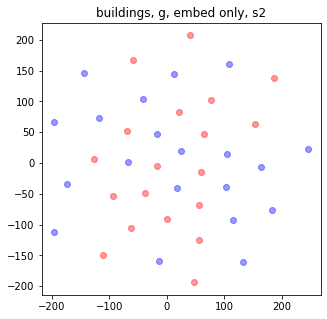

In [218]:
save_path =  os.path.join(os.path.dirname(os.getcwd()), 'data\experiments')

file_name = 'buildings_g_e_s2.png'
title = 'buildings, g, embed only, s2'

tsne_plot_buildings(title, classes_2, tsne_embeds_2d_2, 0.4, key=None, filename=save_path + file_name)

### K-means clustering

Not very useful

In [59]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0])